<h1 style="text-align:center">Perceptron Learning Algorithms (Binary Classifiers)<h1>

## Inputs

- $X:$ A matrix of `n` samples and `p` features.
- $y:$ A vector of `n` target variable values for the `n` samples

## How it works

Assume weights $\textbf{w}: \{w_{1}, w_{2}, w_{3}, ..., {w_p}\}$ have been learnt by the algorithm.

It gets the decision function $\phi (z) = \sum_{i=1}^{p} w_{i}x_{i} = \textbf{w}^{T}\textbf{x}$ for a new/test sample.

If $\phi(z) \ge \theta $ it assigns the sample a value of $+1$, else $-1$

Bringing $\theta$ to the left side, we can treat $w_0 = - \theta$ and $x_0 = 1$ so that if

$ \phi(z) = \sum_{i=0}^{p}w_{i}x_{i} \ge 0, \hat{y} = +1$ else $\hat{y} = -1$ 

## Basic Algorithm

- Initialize weights $\textbf{w}$ to be all zeros. (or small random values)

- For each sample in the input matrix:

  - Calculate the estimated target variable $\hat{y}^{(i)} = \text{sign}(\sum_{i=0}^{p}w_{i}x_{i})$
  
  - Evaluate the updated weights using $\Delta \textbf{w} = \eta (y^{(i)} - \hat{y}^{(i)})\textbf{x}$ ($\eta$ may not be needed since it only scales the weights but doesn't change the sign of the perception)
  
  - Update weights to $\textbf{w} = \textbf{x} + \Delta \textbf{w}$


In case of correct prediction, the weight remains unchanged.

In case of incorrect prediction, the weight are pushed towards the direction of the target variable scaled by $\textbf{x}$

It is important to note that the **convergence** of the perceptron is only **guaranteed** if
the two classes are **linearly separable** and the **learning rate** is sufficiently **small**. If the
two classes can't be separated by a linear decision boundary, we can set a maximum
number of passes over the training dataset (*epochs*) and/or a threshold for the
number of tolerated misclassifications—the perceptron would never stop updating
the weights otherwise

i.e.

Iterate until the iteration error: $\displaystyle \frac{1}{s} \sum_{j=1}^{s} \lvert \hat {y}_{j} - y_{j} \rvert < \gamma$ (user-specified) or for a pre-determined number of iterations

In [6]:
import numpy as np

class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=10):
        '''
        eta : learning rate (between 0.0 and 1.0)
        n_iter : number of passes over training data set
        '''
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        X : matrix (n x p)
        y : target variable vector of n elements
        '''
        self.weights = np.zeros(X.shape[1] + 1)  # weights[0] = threshold theta
        self.errors = []   # stores number of misclassifications each pass
        
        for _ in range(self.n_iter):
            errors = 0
            for X_i, y_i in zip(X, y):
                delta_w = self.eta * (y_i - self.predict(X_i))
                self.weights[1:] += delta_w * X_i
                self.weights[0] += delta_w        # delta_w * 1 (x_0 = 1)
                errors += int(delta_w != 0.0)     # delta_w == 0.0 implies correct classification
            self.errors.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Extending Binary Classifier to Multi-Class Classification

**One-vs.-All (OvA)**, or sometimes also called **One-vs.-Rest (OvR)**, is a
technique, us to extend a binary classifier to multi-class problems. Using
OvA, we can train one classifier per class, where the particular class
is treated as the positive class and the samples from all other classes
are considered as the negative class. If we were to classify a new data
sample, we would use our $k$ - $\phi (z)$ classifiers, where $k$ is the number of
class labels, and assign the class label with the highest confidence to
the particular sample. In the case of the perceptron, we would use OvA
to choose the class label that is associated with the largest absolute net
input value.

In [8]:
# Loading the Iris dataset

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [9]:
df.shape

(150, 5)

In [10]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
import matplotlib.pyplot as plt

In [67]:
# Select first 100 to get only Setosa vs Versicolor data (ignore Virginica)
# TODO: Try taking first 100 as class 1 and last 50 as class 2

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [68]:
X = df.iloc[0:100, [0,2]].values

In [69]:
def shuffle_in_unison_inplace(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

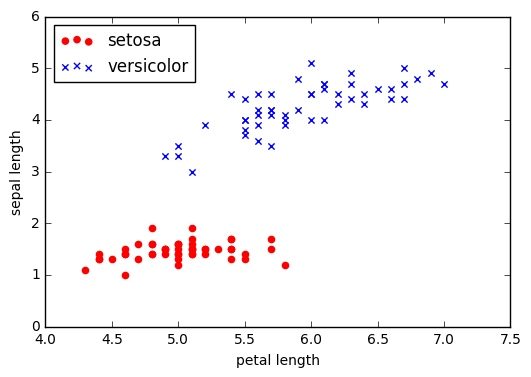

In [70]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc="upper left")
plt.show()

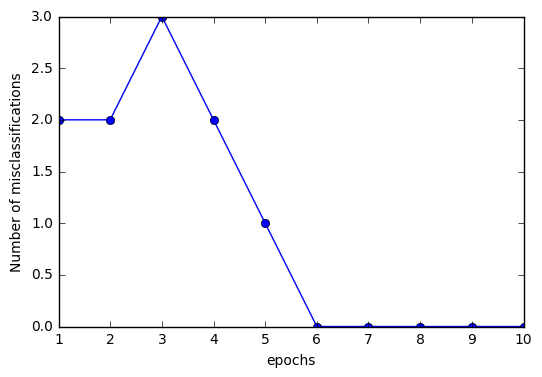

In [71]:
ppn = Perceptron(0.1, 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker="o")
plt.xlabel("epochs")
plt.ylabel("Number of misclassifications")
plt.show()

In [72]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ("s",  "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

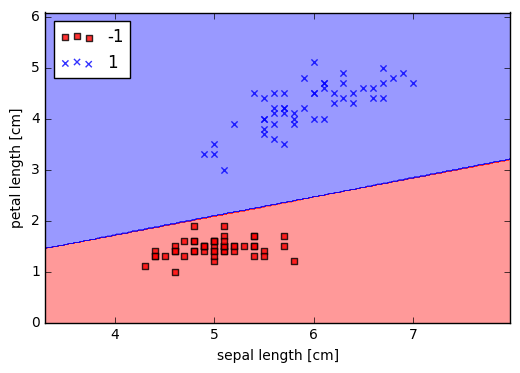

In [73]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()